# **Support Vector Machine on Iris dataset**

# **Import packages**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# **Load data**

In [ ]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()
iris = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
iris['class'] = iris_dataset.target
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# **Dataset description**

In [ ]:
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# **Exploratory data analysis**

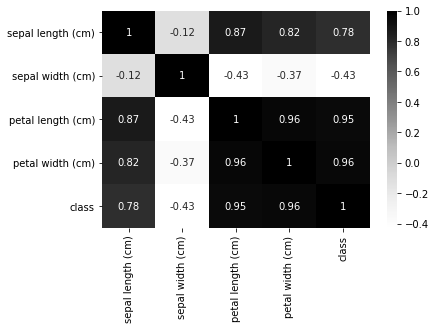

In [ ]:
correlation_matrix = iris.corr()
sns.heatmap(data=correlation_matrix, annot=True,cmap='Greys')

# **Observations**

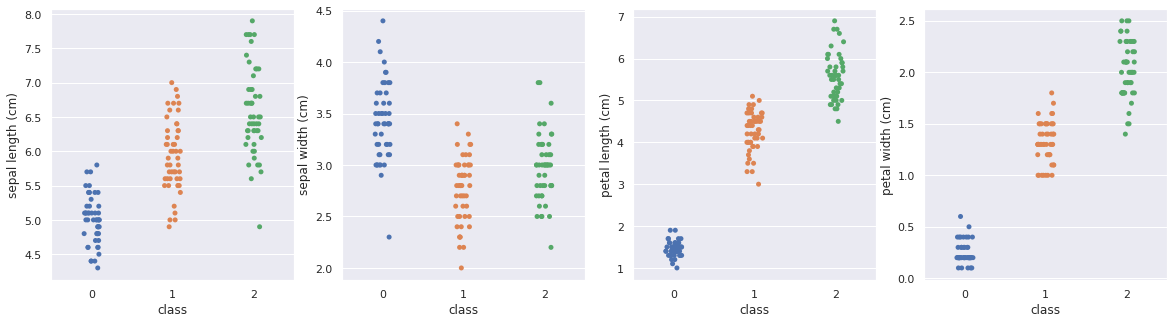

In [ ]:
sns.set()
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target = ['class']

sns.set_theme(style="ticks")
for i, col in enumerate(features):
  sns.stripplot(ax=axes[i], x=target[0], y=col, data=iris)

# **Data preprocessing**

In [ ]:
print(iris.isnull().sum())
print(iris.isnull().sum().value_counts())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64
0    5
dtype: int64




> # **Splitting the data into training and testing sets**



In [ ]:
from sklearn.model_selection import train_test_split

X = iris.iloc[:, [0, 1, 2, 3]].values
y = iris.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (120, 4)
X_test.shape:  (30, 4)
Y_train.shape:  (120,)
Y_test.shape:  (30,)



> # **Feature Scaling**



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Support Vector Machine**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# 1: split data to train and validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2: specify range of hyper-parameters
C_range = np.logspace(-3, 5, 9)         # 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5
gamma_range = np.logspace(-3, 5, 9)     # 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5
param_grid = dict(gamma=gamma_range, C=C_range, probability=[True])

# 3: create classifier
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)

# 4: Train
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05]),
                         'probability': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10.0, 'gamma': 0.01, 'probability': True} with a score of 0.97


# **Model evaluation for training data**



The model performance for training set
--------------------------------------
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.93      0.95        41
           2       0.93      0.97      0.95        39

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

accuracy score is 0.9666666666666667

precision score is 0.9670627475505524

recall score is 0.9670627475505524

f1 score is 0.9666666666666668




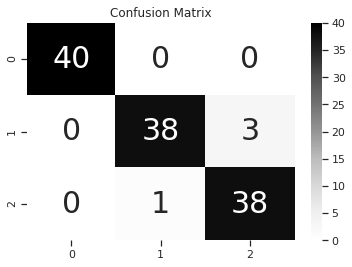

In [ ]:
y_train_predict = grid.predict(X_train)

confusionmatrix = confusion_matrix(y_train, y_train_predict)
accuracyscore = accuracy_score(y_train, y_train_predict)
precisionscore = precision_score(y_train, y_train_predict, average='macro')
recallscore = recall_score(y_train, y_train_predict, average='macro')
f1score = f1_score(y_train, y_train_predict, average='macro')

print("\n")
print("The model performance for training set")
print("--------------------------------------")
print('classification report\n{}'.format(classification_report(y_train, y_train_predict)))
print('accuracy score is {}\n'.format(accuracyscore))
print('precision score is {}\n'.format(precisionscore))
print('recall score is {}\n'.format(recallscore))
print('f1 score is {}'.format(f1score))
print("\n")

ax = plt.axes()
sns.heatmap(confusionmatrix, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Greys", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

# **Predict probabilities for training data**

In [ ]:
probs_y_train = grid.predict_proba(X_train)

probs_y_train = np.round(probs_y_train, 2)

res = "{:<5} | {:<10} | {:<15} | {:<10} | {:<13} | {:<5}".format("No.", "y_train", "y_train_predict", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*80+"\n"
res += "\n".join("{:<5} | {:<10} | {:<15} | {:<10} | {:<13} | {:<10}".
                 format(i, x, y, a, b, c) for i, x, y, a, b, c in zip(range(y_train.shape[0]), y_train, y_train_predict, probs_y_train[:,0], probs_y_train[:,1], probs_y_train[:,2]))

res += "\n"+"-"*80+"\n"
print(res)

No.   | y_train    | y_train_predict | Setosa(%)  | versicolor(%) | virginica(%)
--------------------------------------------------------------------------------
0     | 0          | 0               | 0.99       | 0.01          | 0.01      
1     | 0          | 0               | 0.98       | 0.01          | 0.01      
2     | 1          | 1               | 0.01       | 0.97          | 0.02      
3     | 0          | 0               | 0.97       | 0.02          | 0.01      
4     | 0          | 0               | 0.97       | 0.02          | 0.01      
5     | 2          | 2               | 0.01       | 0.02          | 0.97      
6     | 1          | 1               | 0.02       | 0.96          | 0.03      
7     | 0          | 0               | 0.97       | 0.02          | 0.01      
8     | 0          | 0               | 0.98       | 0.01          | 0.01      
9     | 0          | 0               | 0.99       | 0.0           | 0.01      
10    | 2          | 2               | 0.01     

# **Model evaluation for testing data**



The model performance for training set
--------------------------------------
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

accuracy score is 0.9666666666666667

precision score is 0.9722222222222222

recall score is 0.9629629629629629

f1 score is 0.9658994032395567




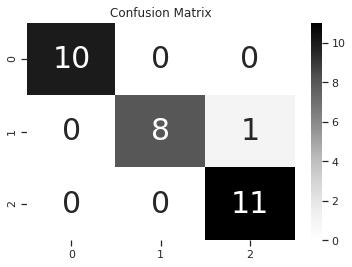

In [ ]:
y_test_predict = grid.predict(X_test)

confusionmatrix = confusion_matrix(y_test, y_test_predict)
raccuracyscore = accuracy_score(y_test, y_test_predict)
precisionscore = precision_score(y_test, y_test_predict, average='macro')
recallscore = recall_score(y_test, y_test_predict, average='macro')
f1score = f1_score(y_test, y_test_predict, average='macro')

print("\n")
print("The model performance for training set")
print("--------------------------------------")
print('classification_report\n{}'.format(classification_report(y_test, y_test_predict)))
print('accuracy score is {}\n'.format(accuracyscore))
print('precision score is {}\n'.format(precisionscore))
print('recall score is {}\n'.format(recallscore))
print('f1 score is {}'.format(f1score))
print("\n")

ax = plt.axes()
sns.heatmap(confusionmatrix, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Greys", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

# **Predict probabilities for testing data**

In [ ]:
probs_y = grid.predict_proba(X_test)

probs_y = np.round(probs_y, 2)

res = "{:<5} | {:<10} | {:<14} | {:<10} | {:<13} | {:<5}".format("No.","y_test", "y_test_predict", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*79+"\n"
res += "\n".join("{:<5} | {:<10} | {:<14} | {:<10} | {:<13} | {:<10}".
                 format(i, x, y, a, b, c) for i, x, y, a, b, c in zip(range(y_test.shape[0]), y_test, y_test_predict, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*79+"\n"
print(res)

No.   | y_test     | y_test_predict | Setosa(%)  | versicolor(%) | virginica(%)
-------------------------------------------------------------------------------
0     | 1          | 1              | 0.01       | 0.96          | 0.03      
1     | 0          | 0              | 0.96       | 0.02          | 0.02      
2     | 2          | 2              | 0.0        | 0.0           | 1.0       
3     | 1          | 1              | 0.01       | 0.9           | 0.09      
4     | 1          | 1              | 0.01       | 0.83          | 0.16      
5     | 0          | 0              | 0.93       | 0.05          | 0.02      
6     | 1          | 1              | 0.04       | 0.94          | 0.01      
7     | 2          | 2              | 0.01       | 0.01          | 0.98      
8     | 1          | 2              | 0.02       | 0.34          | 0.65      
9     | 1          | 1              | 0.02       | 0.97          | 0.01      
10    | 2          | 2              | 0.01       | 0.14     

# **Sources**

1.   https://github.com/snrazavi/Machine_Learning_2018/blob/master/7-SVM/svm_parameters-spiral_dataset.ipynb

2.   https://github.com/GautamVijay/Logistic-Regression-on-IRIS-Dataset/blob/master/Logistic%20Regression%20(IRIS).ipynb

3.   https://randerson112358.medium.com/python-logistic-regression-program-5e1b32f964db

4.   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold

5.   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

6.   https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC